**CÓDIGO 1: Ecuación de Schrodinger Independiente del Tiempo en 1D, Diferencias Finitas: Pozo Gaussiano.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

-Construcción del potencial

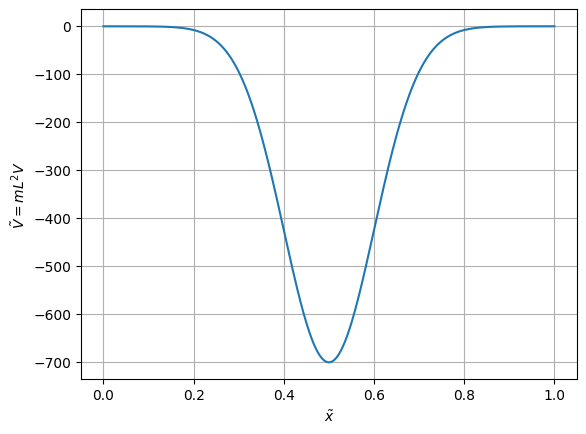

In [2]:
#Definimos el número de puntos de discretización N y el paso h.

N=2000
h=1/N

#Definimos el vector que discretiza el dominio [0,1]

x=np.linspace(0,1,N+1)

#Definimos el potencial Vtilda=mL^2V
#Potencial gaussiano

def Vtilda(x):
    return -700*np.exp(-(x-0.5)**2/(2*0.1**2))


#Graficamos el potencial

V=Vtilda(x)
plt.plot(x,V)
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$\tilde{V}=mL^2V$')   
plt.grid(True)


-Construcción de la matriz hamiltoniana y cálculo de autovectores y autovalores.

In [3]:
#Definimos la diagonal principal sin incluir el primer y último elemento

d=1/h**2+Vtilda(x)[1:-1]

#Definimos la diagonal superior e inferior

e=-1/(2*h**2)*np.ones(len(d)-1)

#Calculamos los autovalores almacenados en  w y los autovectores en v por columnas

w,v=eigh_tridiagonal(d,e) #eigh_tridiagonal permite calcular autovalores y autovectores de una matriz tridiagonal sin necesidad de construirla

-Gráfica de las densidades de probabilidad y funciones de onda

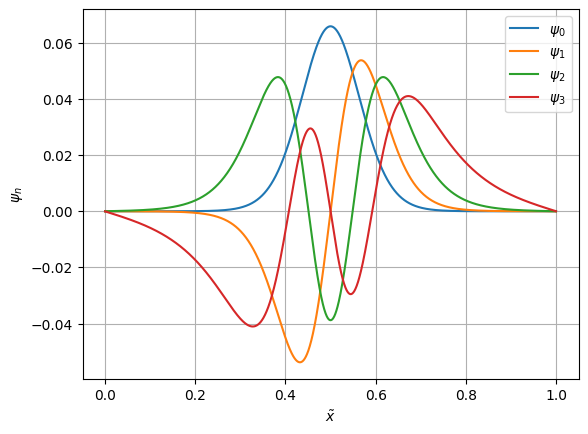

In [4]:
#Mostramos las primeras cuatro autofunciones

plt.plot(x[1:-1],v.T[0],label=r'$\psi_0$')
plt.plot(x[1:-1],v.T[1],label=r'$\psi_1$')
plt.plot(x[1:-1],v.T[2],label=r'$\psi_2$')
plt.plot(x[1:-1],v.T[3],label=r'$\psi_3$')
plt.legend()
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$\psi_n$') 
plt.grid(True)

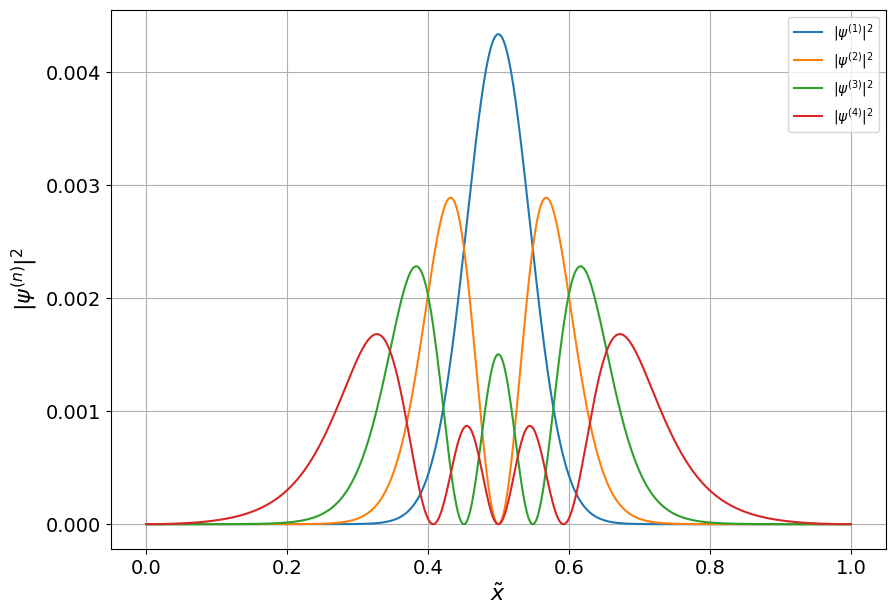

In [5]:
plt.figure(figsize=(10, 7))

for n in range(4):  # los cuatro primeros estados
    plt.plot(x[1:-1], v.T[n]**2, label=fr"$|\psi^{{({n+1})}}|^2$")

plt.legend(loc='upper right')
plt.xlabel(r'$\tilde{x}$', fontsize=16)                    
plt.ylabel(r'$|\psi^{(n)}|^2$', fontsize=16) 
plt.xticks(fontsize=14)                   # números eje X
plt.yticks(fontsize=14)    
plt.grid(True)
plt.show()

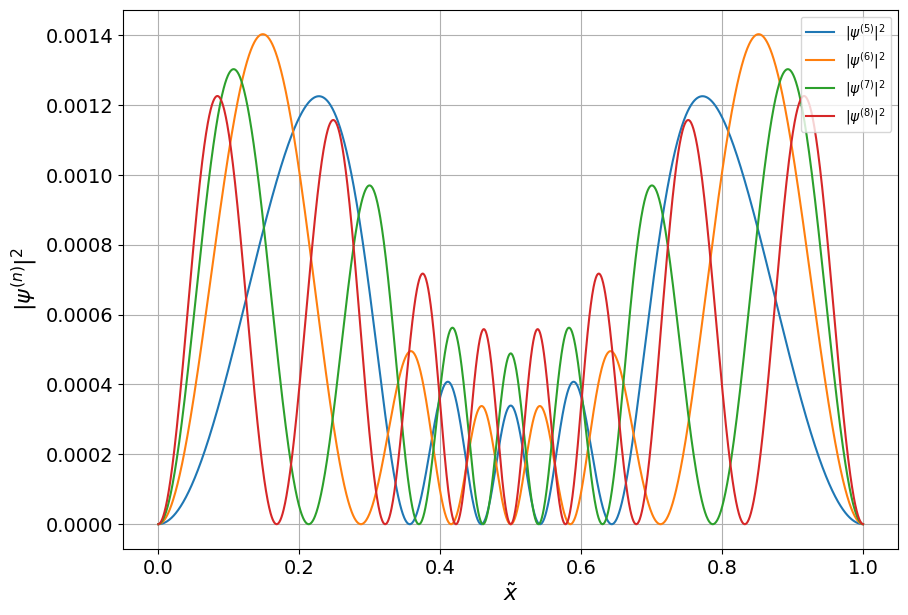

In [8]:
plt.figure(figsize=(10, 7))

for n in range(4,8):  # los cuatro primeros estados
    plt.plot(x[1:-1], v.T[n]**2, label=fr"$|\psi^{{({n+1})}}|^2$")

plt.legend(loc='upper right')
plt.xlabel(r'$\tilde{x}$', fontsize=16)                    
plt.ylabel(r'$|\psi^{(n)}|^2$', fontsize=16) 
plt.xticks(fontsize=14)                   # números eje X
plt.yticks(fontsize=14)    
plt.grid(True)
plt.show()

-Cálculo de los autovalores/energías propias

E_0 = -577.144560
E_1 = -352.126996
E_2 = -171.677221
E_3 = -45.088713
E_4 = 18.977781
E_5 = 55.465342
E_6 = 107.489492
E_7 = 174.429075
E_8 = 252.053129
E_9 = 341.412033


Text(0, 0.5, '$mL^2E/\\hbar^2$')

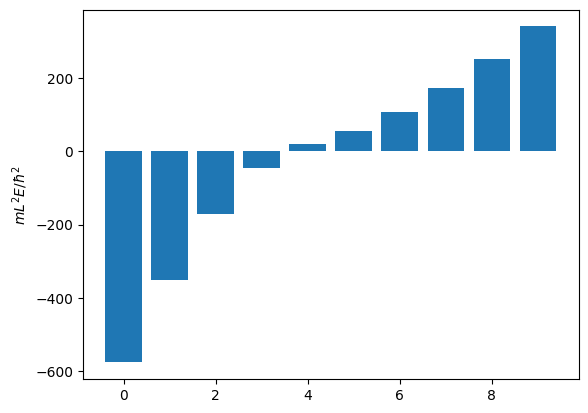

In [6]:
#Mostramos los primeros 10 autovalores
for i in range(10):
    print(f'E_{i} = {w[i]:.6f}')

plt.bar(np.arange(0,10,1),w[0:10])
plt.ylabel(r'$mL^2E/\hbar^2$') #Realmente estamos obteniendo Etilda=mL^2E y se debe dividir por hbar^2 para que tenga sentido dimensionalmente

E_1 = -43.9782 eV
E_2 = -26.8320 eV
E_3 = -13.0817 eV
E_4 = -3.4357 eV
E_5 = 1.4461 eV
E_6 = 4.2264 eV
E_7 = 8.1907 eV
E_8 = 13.2914 eV
E_9 = 19.2064 eV


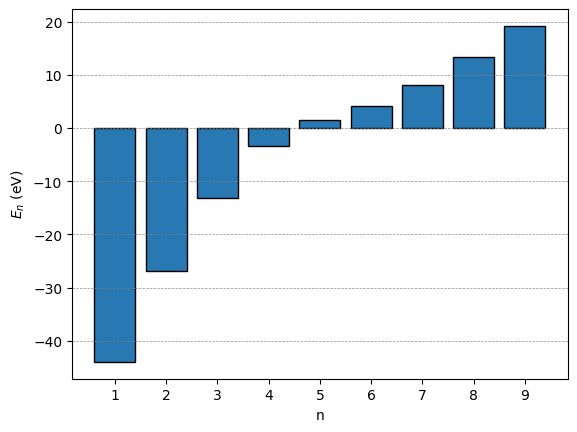

In [7]:


# Constantes físicas
hbar = 1.054_571_817e-34  # J·s
eV   = 1.602_176_634e-19  # J/eV

# Parámetros físicos
m      = 9.109_383_7015e-31  # kg (masa del electrón)
L_phys = 1e-9                # m (1 nm de ancho de pozo)

# Conversión de autovalores adimensionales a reales
#   w = (m L^2 / ħ^2) * E   ⇒   E = (ħ^2 / m L^2) * w
E_J  = (hbar**2) * w / (m * L_phys**2)  # en Joule
E_eV = E_J / eV                         # en eV

n = np.arange(1, 10)
# Mostrar los primeros 10 autovalores
for i in range(9):
    print(f'E_{i+1} = {E_eV[i]:.4f} eV')

# Graficar en mismo estilo que tu código original
plt.bar(n, E_eV[:9], color="#2778b3", edgecolor="black")
plt.ylabel(r'$E_n$ (eV)')
plt.xlabel("n")
plt.xticks(n)  # ticks de 1 en 1, empezando en 1
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5, color="gray", alpha=0.9)
plt.show()